# DNN for AED with Keras/TensorFlow

Date: November 11, 2018 and February 27, 2019

Neural network: input MFCC to DNN

## Preparing data set for CNN

In [54]:
DATASET_FOLDER = '../dataset/data_environment'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=False)
shape = ds.shape
class_labels = ds.class_labels

((420, 64, 40, 1), (180, 64, 40, 1))

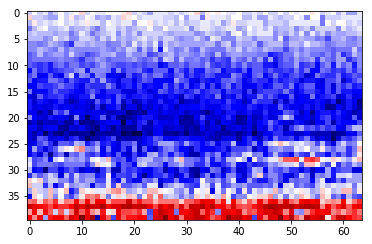

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)), cmap='seismic')
train_data.shape, test_data.shape

### DNN model

In [62]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 38, 4)         40        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 19, 4)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 17, 8)         296       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 8, 8)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 6, 16)         1168      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 3, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 288)               0         
__________

In [63]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

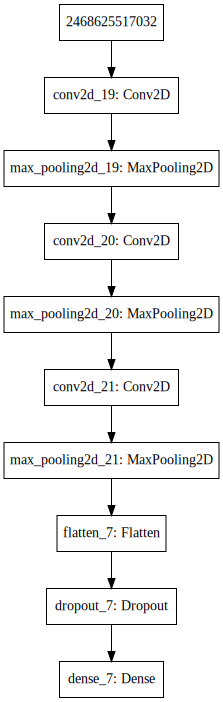

In [64]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [65]:
EPOCHS = 30
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 420 samples, validate on 180 samples
Epoch 1/30
420/420 [==============================] - 3s 7ms/step - loss: 1.7572 - acc: 0.2476 - val_loss: 1.6304 - val_acc: 0.4389
Epoch 2/30
420/420 [==============================] - 2s 5ms/step - loss: 1.5941 - acc: 0.3714 - val_loss: 1.4160 - val_acc: 0.6722
Epoch 3/30
420/420 [==============================] - 2s 5ms/step - loss: 1.3611 - acc: 0.4810 - val_loss: 1.1691 - val_acc: 0.6500
Epoch 4/30
420/420 [==============================] - 2s 5ms/step - loss: 1.1690 - acc: 0.5667 - val_loss: 1.0027 - val_acc: 0.6333
Epoch 5/30
420/420 [==============================] - 2s 6ms/step - loss: 1.0866 - acc: 0.5857 - val_loss: 0.8887 - val_acc: 0.6556
Epoch 6/30
420/420 [==============================] - 2s 5ms/step - loss: 0.9618 - acc: 0.6405 - val_loss: 0.7973 - val_acc: 0.7444
Epoch 7/30
420/420 [==============================] - 2s 6ms/step - loss: 0.9111 - acc: 0.6571 - val_loss: 0.7567 - val_acc: 0.7389
Epoch 8/30
420/420 [==========

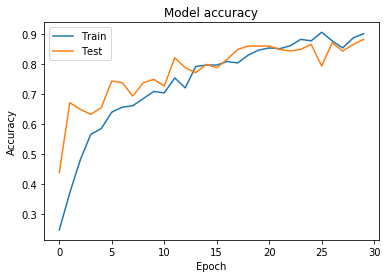

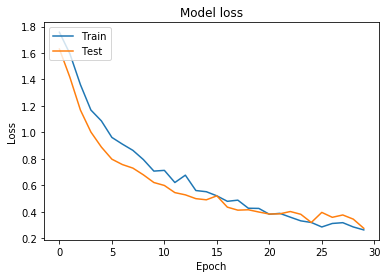

In [66]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [67]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/cnn_for_aed_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [68]:
del model
model = models.load_model(filename)

## Confirmation

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [71]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [72]:
class_labels

['train_tokyu_1',
 'yokohama_station_tokyu',
 'mcdonalds',
 'landmark_tower_mall',
 'yokohama_port',
 'street']

In [73]:
(activations[-1][:10]*100).astype(int)

array([[ 1,  0,  0,  0, 89,  8],
       [98,  1,  0,  0,  0,  0],
       [13,  0, 85,  0,  0,  0],
       [ 1,  0,  0, 98,  0,  0],
       [83,  0,  1,  0,  5,  8],
       [ 0,  0,  0, 99,  0,  0],
       [ 0,  0,  0,  0, 82, 17],
       [ 1,  0, 98,  0,  0,  0],
       [ 5, 93,  0,  0,  0,  0],
       [37, 58,  0,  0,  0,  3]])

In [74]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])